## Анализ пользовательской активности в городе Москва и Санкт-Петербург

- Автор: Коновалова Александра Евгеньевна 
- Дата: 29.05.25

## Цели и задачи проекта
Цель проекта: проверить гипотезу: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.
    
Задачи проекта: 
    
    1. Загрузка и предообработка данных
    
    2. Проверка гипотезы
    
    3. Выводы
    


## Описание данных

Данные представлены уже предообработанной таблицей, которая включает в себя всех пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания)

city - город пользователя

puid - индентификатор пользователя

hours - суммарное время прослушивание и чтения пользователем на платформе

## Содержимое проекта


---
**Содержание проекта:**
1. Загрузка данных
2. Знакомство с данными
3. Предообработка данных
4. Проверка гипотезы 
5. Выводы на основе проведенного эксперимента 

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Пустые ячейки после каждого задания — примерное пространство для работы.
# Вы можете свободно добавлять или удалять ячейки по своему усмотрению в зависимости от логики и объёма работы.

In [2]:
# Используйте ячейки типа Code для вашего кода

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu 
import numpy as np
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportions_ztest

In [4]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [5]:
# Проверяем наличие дубликатов в индентификаторах пользователей 
display (df.duplicated(subset = 'puid').sum())

244

In [6]:
# Дубликаты найдены, для точности анализа удалим их
df = df.drop_duplicates(subset = 'puid')
display (df.duplicated(subset = 'puid').sum())

0

In [7]:
# Проверяем размеры групп 
display (df.groupby('city')['puid'].count()) 

city
Москва             6234
Санкт-Петербург    2306
Name: puid, dtype: int64

In [8]:
# Рассчитываем долю количества пользователей для каждой группы
group_share = df.groupby('city')['puid'].count()/df['puid'].count()

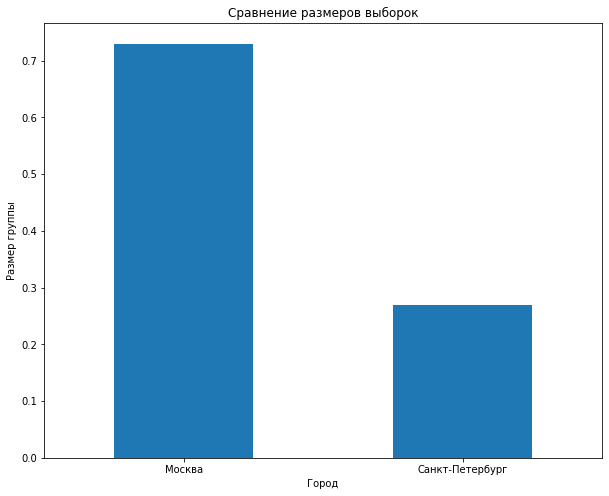

In [9]:
#Визуализируем размеры выборок 
plt.figure(figsize=(10, 8))
group_share.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Сравнение размеров выборок')
plt.xlabel('Город')
plt.ylabel('Размер группы')
plt.show()

Мы видим, что размеры групп значительно различаются, что нужно учесть при выборе статистического теста

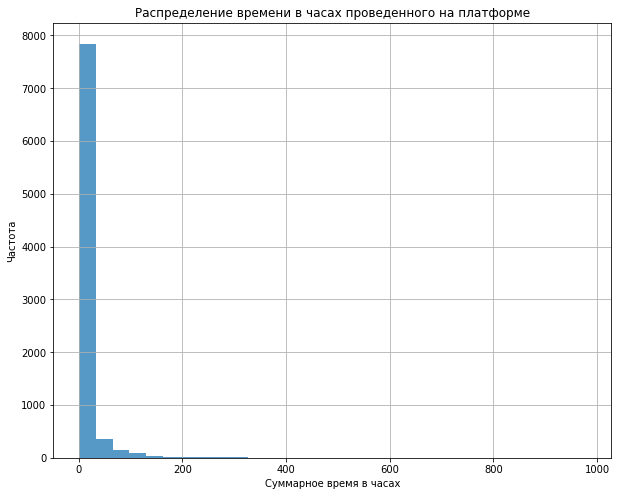

In [10]:
# Проверим наличие выбросов в данных
plt.figure(figsize=(10, 8))
df['hours'].plot(
                kind='hist', 
                bins=30, 
                alpha=0.75,
)
plt.title('Распределение времени в часах проведенного на платформе')
plt.xlabel('Суммарное время в часах')
plt.ylabel('Частота')
plt.grid()
plt.show()

Видно наличие выбросов в данных, что также необходимо учесть при выборе статистического теста 

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в Санкт-Петербург не больше, чем в Москве.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [11]:
# Проверяем средние значения прослушиваний на платформе для каждой группы 
display (df.groupby('city')['hours'].mean()) 

city
Москва             10.881092
Санкт-Петербург    11.264433
Name: hours, dtype: float64

По полученным данным видна разница в значениях, однако необходимо определить является ли эта разница существенной

In [13]:
m_c = df[df['city']=='Санкт-Петербург']['hours']
m_m = df[df['city']=='Москва']['hours']
test_result = mannwhitneyu(m_c,
                          m_m,
                          alternative = 'greater')
alpha = 0.05
if test_result.pvalue > alpha:
    print(f'pvalue={test_result.pvalue} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print(f'pvalue={test_result.pvalue} < {alpha}')
    print('Отвергаем нулевую гипотезу')

pvalue=0.6189600878052618 > 0.05
Не получилось отвергнуть нулевую гипотезу


## 3. Аналитическая записка

- Был выбран тест Манна Уитни, так как он устойчив к выбросам и неравномерному размеру выборок, уровень значимость - 5%

- Нулевую гипотезу не получилось отвергнуть, pvalue=0.6189600878052618.

- Так как нулевая гипотеза не отвергнута, статистической разницы в данных между двумя группами не выявлено. Это значит, что предположение о том, что в Питере читают больше, чем в Москве не находит подтверждения 

- Разницы не выявлено, предположение оказалось ошибочным, возможно, оно было выдвинуто из-за представления о Питере, как о культурной столице.



----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Цель исследования: "Проверить гипотезу о том, что новая версия сайта BitMotion Kit повысит конверсию в покупку"



## 2. Загрузите данные, оцените их целостность.


In [14]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)
participants.info()
participants.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [15]:
events.info()
events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [16]:
# Проверяем дубликаты в таблице events
display (events.duplicated().sum())

36318

In [17]:
# В таблице найдено большое количество явных дубликатов, что может привести к некорректному анализу, поэтому удалим их
events = events.drop_duplicates()
display (events.duplicated().sum())
events.info()

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750968 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     750968 non-null  object        
 1   event_dt    750968 non-null  datetime64[ns]
 2   event_name  750968 non-null  object        
 3   details     244905 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 28.6+ MB


Данные целостны, пропущенные значения наблюдается только в столбце details таблицы events и объясняются спецификой столбца, так как он включает в себя доп. данные о событии, что не обязательно для каждого события. Типы данных также релеванты для каждого столбца. В таблице events было найдено 36318 явных дубликатов, которые были удалены 

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [18]:
# Выделяем пользователей, участвующих в тесте 
interface_eu_test = participants[participants['ab_test']=='interface_eu_test']
interface_eu_test.info()
interface_eu_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10850 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  10850 non-null  object
 1   group    10850 non-null  object
 2   ab_test  10850 non-null  object
 3   device   10850 non-null  object
dtypes: object(4)
memory usage: 423.8+ KB


,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
2,001064FEAAB631A1,A,interface_eu_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android


In [19]:
# Проверяем равномерность распределения пользователей по группам 
display(interface_eu_test.groupby('group')['user_id'].nunique())

group
A    5383
B    5467
Name: user_id, dtype: int64

In [20]:

display(100 * interface_eu_test[interface_eu_test['group'] == 'A']['user_id'].nunique() / interface_eu_test['user_id'].nunique(), 100 * interface_eu_test[interface_eu_test['group'] == 'B']['user_id'].nunique() / interface_eu_test['user_id'].nunique())


49.61290322580645

50.38709677419355

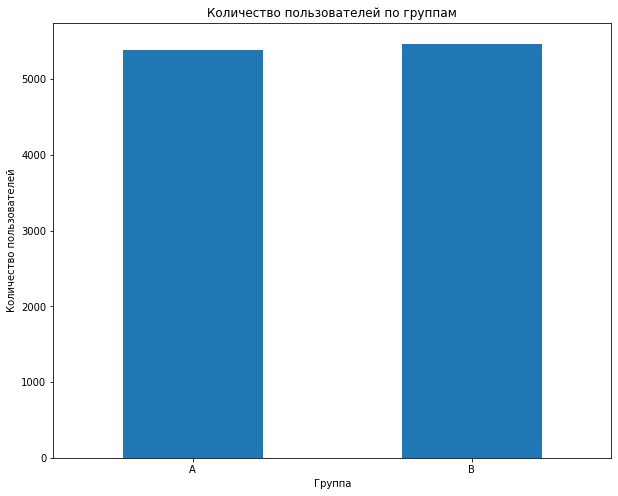

In [21]:
# Визуализируем размер выборок 
plt.figure(figsize=(10, 8))
interface_eu_test.groupby('group')['user_id'].nunique().plot(kind = 'bar')
plt.title('Количество пользователей по группам')
plt.xticks(rotation=0)
plt.xlabel('Группа')
plt.ylabel('Количество пользователей')
plt.show()

In [22]:
# Проверяем группы на пересечение в тесте interface_eu_test:
a = interface_eu_test[interface_eu_test['group'] == 'A']['user_id']
b = interface_eu_test[interface_eu_test['group'] == 'B']['user_id']

intersection = list(set(a) & set(b))
display(intersection)

[]

In [23]:
# Проверяем есть ли пересения между пользователями в таблице participants, так как там содержится информация о проведении 2 тестов
participants_b_r = participants[(participants['group'] == 'B') & (participants['ab_test'] == 'recommender_system_test')]

r = participants_b_r['user_id']
i = interface_eu_test[interface_eu_test['group'] == 'B']['user_id']
intersection_tests = list(set(r) & set(i))
display(intersection_tests)

['23F551153080EBAB',
 'E32D4C0315D6BFBE',
 '98D45D3A9D7E3911',
 '13AA9B89A2885F8E',
 '6B72CFAE1935C789',
 'EA8341F38EFFE04C',
 '0A0141A363E2E051',
 'A6E6ECF8E4924633',
 '430C998549E88DAE',
 'EAFB9027A27D510C',
 '565EF59DDD36B95B',
 '82F72EC6CDC1BA8F',
 '13FBEB715F4AAE10',
 'BF1EB8E6FA3F19B8',
 '3F52D53AB33C9FD6',
 '70CE04E185154AD7',
 'BA98FD8F84C838C7',
 '63F5FC15B31DB5A6',
 'EF449601C94D2496',
 '75013CAAF42E90A9',
 '0FBF679EA1340786',
 '6610064A4B2303D1',
 '928364C4C9F13FA8',
 '2D6A6472D7F46812',
 '4CF756542084F860',
 '0C2E77C6A381704A',
 '502902B3C32C72FF',
 'A8C25A605F613665',
 '95401934D6D6D4FC',
 '59D9BD2A3172D3F4',
 'F8564F547AFFC0B9',
 '47ADBF580CF107E1',
 'FC2DA0D7EF375B27',
 '4122B8F30EB2271C',
 'B3059CB4FD2DE0FA',
 '6786C23A54D59DD4',
 'E68002AA33773AD5',
 '3DEA2F9B3EDA8B91',
 '24FB1A84E1C30291',
 '5207E56E697027E9',
 '902F92052587344F',
 'BA9906DF9975512E',
 '3B3F68DC5779E517',
 '5B1F39B5D751B669',
 'C89E24F4C723CEF4',
 'C04E36E535A6F740',
 'E1EA339E17C0D568',
 '067D05BD30F

In [24]:
# Пересечения найдены, для корректности дальнейшего теста необходимо их удалить 
interface_eu_test = interface_eu_test[~interface_eu_test['user_id'].isin(participants_b_r['user_id'])]

В тесте interface_eu_test значимых расхождения в размерах групп не обнаружено, также в группах не были обнаружены пересечения. Однако были обнаружены перессечения с конкурирующим тестов между участниками групп B, пользователеи, которые попали в два тесте сразу были удалены, так как невозможно обнаружить какие именно изменения повлияли на их активность.

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [25]:
ab_test_events = events[events['user_id'].isin(interface_eu_test['user_id'])]
ab_test_events.info()
ab_test_events.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72298 entries, 64672 to 780371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     72298 non-null  object        
 1   event_dt    72298 non-null  datetime64[ns]
 2   event_name  72298 non-null  object        
 3   details     20085 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


,user_id,event_dt,event_name,details
64672,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0
64946,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8
66585,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32
67873,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48
67930,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [26]:
# Выводим дату регистрации для пользователей 
registration_user = ab_test_events[ab_test_events['event_name']=='registration'][['user_id','event_dt']]
# Переименуем столбцы 
registration_user = registration_user.rename(columns={'event_dt':'registration_dt'})
registration_user.head()

,user_id,registration_dt
64672,5F506CEBEDC05D30,2020-12-06 14:10:01
64946,51278A006E918D97,2020-12-06 14:37:25
66585,A0C1E8EFAD874D8B,2020-12-06 17:20:22
67873,275A8D6254ACF530,2020-12-06 19:36:54
67930,0B704EB2DC7FCA4B,2020-12-06 19:42:20


In [27]:
# Объединяем датафреймы 
df = ab_test_events.merge(registration_user, on = 'user_id', how = 'left')
df.head()

,user_id,event_dt,event_name,details,registration_dt
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20


In [28]:
# Рассчитываем разницу между датой регистрации и первым событием 
df['difference'] = (df['event_dt']-df['registration_dt']).dt.days
df.head()

,user_id,event_dt,event_name,details,registration_dt,difference
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25,0
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22,0
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54,0
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20,0


In [29]:
# Оставляем только те данные, где прошло не больше 7 дней с момента регистрации 
df = df[df['difference']<7]

In [30]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62383 entries, 0 to 72276
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          62383 non-null  object        
 1   event_dt         62383 non-null  datetime64[ns]
 2   event_name       62383 non-null  object        
 3   details          16815 non-null  object        
 4   registration_dt  62383 non-null  datetime64[ns]
 5   difference       62383 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 3.3+ MB


,user_id,event_dt,event_name,details,registration_dt,difference
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25,0
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22,0
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54,0
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20,0


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

- Ожидаемый припрост - 3 п.п.

In [31]:
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8 # Мощность теста
p = 0.3  # Показатель конверсии
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = abs(2 * (np.arcsin(np.sqrt(p)) - np.arcsin(np.sqrt(p + mde)))),
    power = power,
    alpha = alpha,
    ratio = 1,
    alternative='larger'# Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 2963


Необходимый размер выборки для каждой группы: 2963. Тест проводится корректно, так как на каждую группу получается чуть больше 5к пользователей, это значит, что проведенный тест имеет достаточную мощность и снижается риск ошибки второго рода.

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [32]:
# Объединяем датафреймы 
df_all = interface_eu_test.merge(df, on = 'user_id', how = 'left')
df_all.head()

,user_id,group,ab_test,device,event_dt,event_name,details,registration_dt,difference
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38,2020-12-07 04:37:31,0
1,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:49,login,NaN,2020-12-07 04:37:31,0
2,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:57,login,NaN,2020-12-07 04:37:31,0
3,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:38:54,login,NaN,2020-12-07 04:37:31,0
4,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:35,login,NaN,2020-12-07 04:37:31,1


In [33]:
# Рассчитываем количество всех пользователей и тех, кто совершил покупку 
all_users = df_all.groupby('group')['user_id'].nunique()
buyers = df_all[df_all['event_name']=='purchase'].groupby('group')['user_id'].nunique()
share_buyers = buyers/all_users
display(all_users, buyers, share_buyers)

group
A    5277
B    5351
Name: user_id, dtype: int64

group
A    1454
B    1579
Name: user_id, dtype: int64

group
A    0.275535
B    0.295085
Name: user_id, dtype: float64

- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

Предварительно можно сделать вывод о том, что среди пользователей, которые используют новую версию сайта конверсия в покупку выше, чем в другой группе. Однако прироста в предполагаемые 3 п.п. не наблюдается.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

H0 - Конверсия в покупку в тестовой группе не выше, чем в контрольной.

Н1 - Конверсия в покупку в тестовой группе выше, чем в контрольной.

In [34]:
# Считаем размеры выборок для применения z теста пропорций 
n_a = df_all[df_all['group']=='A']['user_id'].nunique()
n_b =  df_all[df_all['group']=='B']['user_id'].nunique()
# Считаем количество успехов в выборках для применения z теста пропорций 
m_a = df_all[(df_all['group'] == 'A') & (df_all['event_name'] == 'purchase')]['user_id'].nunique()
m_b = df_all[(df_all['group'] == 'B') & (df_all['event_name'] == 'purchase')]['user_id'].nunique()

#Применяем z тест пропорций
stat_ztest, p_value_ztest = proportions_ztest(
    [m_b ,m_a],
    [n_b, n_a],
    alternative = 'larger'
)
alpha = 0.05
if p_value_ztest > alpha:
    print(f'pvalue={p_value_ztest} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print(f'pvalue={p_value_ztest} < {alpha}')
    print('Отвергаем нулевую гипотезу')

pvalue=0.01282747194234516 < 0.05
Отвергаем нулевую гипотезу


Гипотеза находит свое подтверждения по результатам z-теста пропорций, что говорит о положительном влиянии изменений на сайте. Пользователи чаще совершают покупку, чем те, что пользуются старой версией сайта. 

Z-тест пропорций был выбран, так как конверсия в покупку - долевая метрика 

pvalue=0.01282747194234516

Нулевая гипотеза была отвергнута 

Нововедения в приложения показали свою эффективности, однако, как мы отметили выше, нововведение показало рост на 2 п.п., а не на 3 п.п., как ожидалось ранее. Целесообразности их внедрения изменений необходимо проверять еще раз. 